<a href="https://colab.research.google.com/github/Rizqisafitri/Reviews_Crewdible/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import re

In [2]:
from google.colab import files
file = files.upload()


Saving dataCrewdible.xlsx to dataCrewdible (1).xlsx


In [3]:
df = pd.read_excel('dataCrewdible.xlsx')
df.head(5)

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,af93b80f-b093-4dc9-97ae-e8103ced7ab4,Benayaptr,https://play-lh.googleusercontent.com/a-/AOh14...,"bagus aplikasinya, rekomen banget untuk yg lag...",5,0,3.6.7,2022-06-24 15:20:23,NaN,NaT
1,1,f2a203e6-6d6d-429f-9e87-173cb5e5bc0f,Chelsea Putri,https://play-lh.googleusercontent.com/a-/AOh14...,Sangat puas dengan aplikasi ini sebab sangat b...,5,0,3.6.7,2022-06-24 14:49:35,NaN,NaT
2,2,6dfbc264-2861-40d6-ba2e-c70a6b4e3e13,tresha agatha,https://play-lh.googleusercontent.com/a-/AOh14...,This app really helpful 👍 And also nice to use,5,0,3.6.7,2022-06-24 14:40:08,NaN,NaT
3,3,f5a46c64-f07e-4808-aad0-0ae19f342c20,Said Muhammad Izzat,https://play-lh.googleusercontent.com/a-/AOh14...,"Dari pertama kali pake, langsung mengerti.. Ap...",5,0,3.6.7,2022-06-24 14:24:09,NaN,NaT
4,4,2b25ac72-dce9-48a1-8641-f8fccb979fe1,20-057 Fernaldi Aulia,https://play-lh.googleusercontent.com/a-/AOh14...,Simple and easy to understand UI makes this ap...,5,0,3.6.7,2022-06-24 12:59:17,NaN,NaT


# **Explore Data**

In [4]:
data =df[['content', 'score']]
data

,content,score
0,"bagus aplikasinya, rekomen banget untuk yg lag...",5
1,Sangat puas dengan aplikasi ini sebab sangat b...,5
2,This app really helpful 👍 And also nice to use,5
3,"Dari pertama kali pake, langsung mengerti.. Ap...",5
4,Simple and easy to understand UI makes this ap...,5
...,...,...
351,great app,5
352,I can't use it. It always stopped,1
353,Apps masih tahap penyempurnaan.Langsung diarah...,3
354,Best 4ever,5


In [5]:
# looking the shape DataSet
data.shape

(356, 2)

In [6]:
#Checking the dtypes of all the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  356 non-null    object
 1   score    356 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.7+ KB


In [7]:
#checking null value 
data.isna().sum()

content    0
score      0
dtype: int64

In [8]:
tb_counts=data['score'].value_counts()
tb_counts

5    294
1     36
3     12
4      8
2      6
Name: score, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


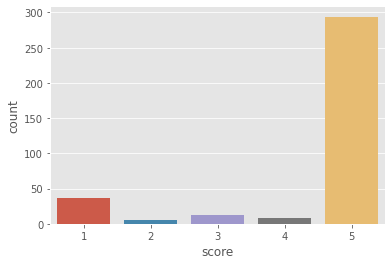

In [9]:
sns.countplot(df['score'])
plt.show()

In [10]:
# Length of word in sentence
data['Length'] = data['content'].apply(len)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,content,score,Length
0,"bagus aplikasinya, rekomen banget untuk yg lag...",5,97
1,Sangat puas dengan aplikasi ini sebab sangat b...,5,98
2,This app really helpful 👍 And also nice to use,5,46
3,"Dari pertama kali pake, langsung mengerti.. Ap...",5,131
4,Simple and easy to understand UI makes this ap...,5,94


**WordCloud Score 5**

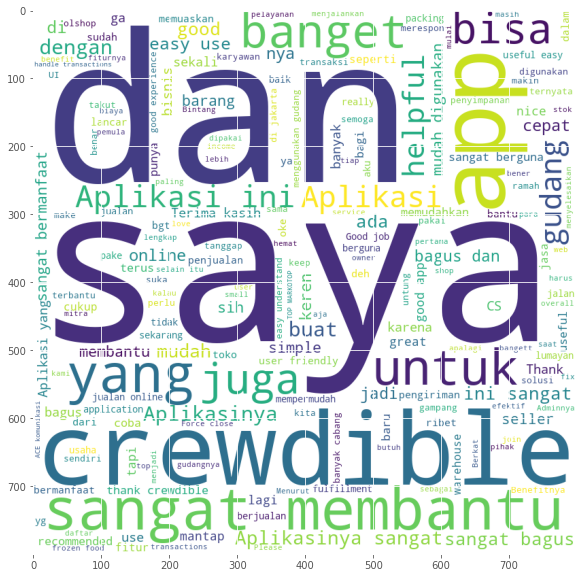

In [11]:
data_5=data[data["score"]==5]

plt.figure(figsize=(10,10))
wc1 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(data_5['content']))

plt.imshow(wc1)

**WordCloud Score 4**

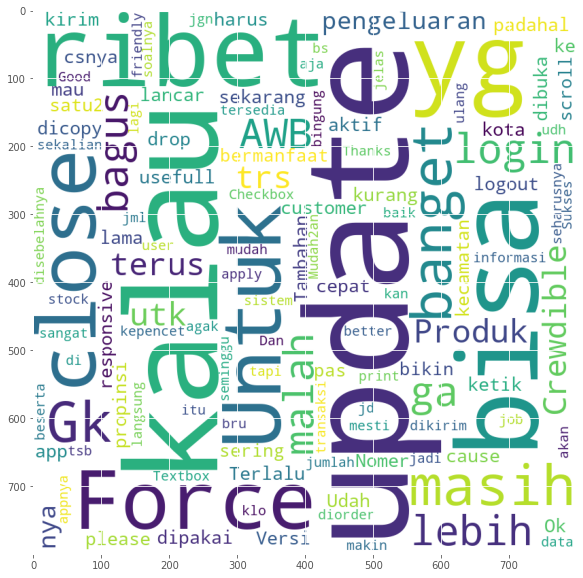

In [12]:
data_4=data[data["score"]==4]

plt.figure(figsize=(10,10))
wc4 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(data_4['content']))

plt.imshow(wc4)

**WordCloud Score 3**

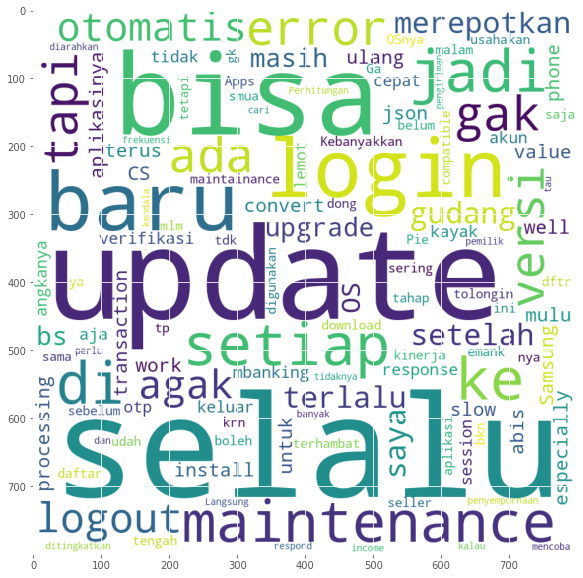

In [13]:
data_3=data[data["score"]==3]
plt.figure(figsize=(10,10))
wc3 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(data_3['content']))

plt.imshow(wc3)

**WordCloud Score 2**

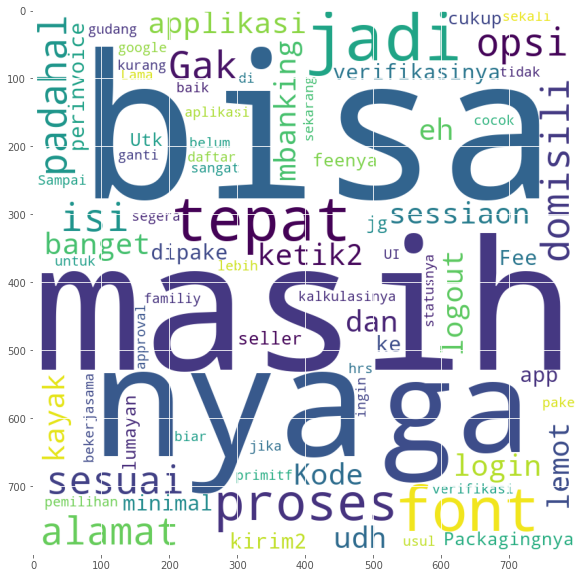

In [14]:
data_2=data[data["score"]==2]

plt.figure(figsize=(10,10))
wc2 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(data_2['content']))

plt.imshow(wc2)

**WordCloud Score 1**

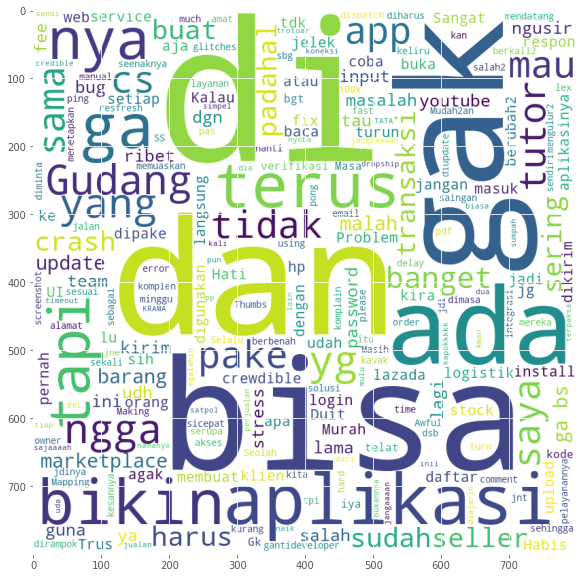

In [15]:
data_1=data[data["score"]==1]

plt.figure(figsize=(10,10))
wc1 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(data_1['content']))

plt.imshow(wc1)

## **Encoding Positive, Neutral and Negative labels**

In [16]:
pos = [5]
neg = [1, 2]
neu = [3, 4]

def sentiment(score):
  if score in pos:
    return 'Positive'
  elif score in neg:
    return 'Negative'
  else:
    return 'Neutral'  
data['Sentiment'] = data['score'].apply(sentiment)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,content,score,Length,Sentiment
0,"bagus aplikasinya, rekomen banget untuk yg lag...",5,97,Positive
1,Sangat puas dengan aplikasi ini sebab sangat b...,5,98,Positive
2,This app really helpful 👍 And also nice to use,5,46,Positive
3,"Dari pertama kali pake, langsung mengerti.. Ap...",5,131,Positive
4,Simple and easy to understand UI makes this ap...,5,94,Positive


In [17]:
fig = go.Figure([go.Bar(x=data.Sentiment.value_counts().index, y=data.Sentiment.value_counts().tolist())])
fig.update_layout(
    title="Values in each Sentiment",
    xaxis_title="Sentiment",
    yaxis_title="Values")
fig.show()

# **Classification & Analysis**

In [18]:
# Length of word in sentence
data['Length'] = data['content'].apply(len)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,content,score,Length,Sentiment
0,"bagus aplikasinya, rekomen banget untuk yg lag...",5,97,Positive
1,Sangat puas dengan aplikasi ini sebab sangat b...,5,98,Positive
2,This app really helpful 👍 And also nice to use,5,46,Positive
3,"Dari pertama kali pake, langsung mengerti.. Ap...",5,131,Positive
4,Simple and easy to understand UI makes this ap...,5,94,Positive


In [19]:
# first review
a=data.iloc[0,0]
a

'bagus aplikasinya, rekomen banget untuk yg lagi butuh penyimpanan dll. worth it banget sih ini!!!'

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [21]:
a=re.sub('[^a-zA-Z0-9]',' ',a)
a=a.lower().split()
a

['bagus',
 'aplikasinya',
 'rekomen',
 'banget',
 'untuk',
 'yg',
 'lagi',
 'butuh',
 'penyimpanan',
 'dll',
 'worth',
 'it',
 'banget',
 'sih',
 'ini']

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
sw=nltk.corpus.stopwords.words("indonesian")
new_words=('the','is', 'to', 'be','this','dll','sih','and','it','its','yg','nya')
for i in new_words:
    sw.append(i)
print(sw)


['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [24]:
clean_word=[i for i in a if not i in sw]
clean_word

['bagus',
 'aplikasinya',
 'rekomen',
 'banget',
 'butuh',
 'penyimpanan',
 'worth',
 'banget']

In [25]:
sen=' '.join(clean_word)
sen

'bagus aplikasinya rekomen banget butuh penyimpanan worth banget'

In [26]:
def text_preprocessing(a):
  a=re.sub('[^a-zA-Z]',' ',a)
  a=a.lower().split()
  ps=PorterStemmer()
  clean_word=[ps.stem(i) for i in a if not i in sw]
  sen=' '.join(clean_word)
  return sen

In [27]:
data['clean_word']=data["content"].apply(text_preprocessing)
data.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,content,score,Length,Sentiment,clean_word
0,"bagus aplikasinya, rekomen banget untuk yg lag...",5,97,Positive,bagu aplikasinya rekomen banget butuh penyimpa...
1,Sangat puas dengan aplikasi ini sebab sangat b...,5,98,Positive,pua aplikasi berguna mudah
2,This app really helpful 👍 And also nice to use,5,46,Positive,app realli help also nice use
3,"Dari pertama kali pake, langsung mengerti.. Ap...",5,131,Positive,kali pake langsung mengerti aplikasi gampang d...
4,Simple and easy to understand UI makes this ap...,5,94,Positive,simpl easi understand ui make app veri easi us...
5,This app is amazing !! It is beneficial for an...,5,121,Positive,app amaz benefici for an onlin seller like me ...
6,I found this app is very helpful. All the feat...,5,110,Positive,i found app veri help all featur are easi use ...
7,Aplikasi yang bekerja dengan efektif dan efisi...,5,125,Positive,aplikasi efektif efisien membantu pengguna cs ...
8,"Aplikasi yang sangat bagus, mempermudah Dan me...",5,173,Positive,aplikasi bagu mempermudah pengalaman memuaskan...
9,aplikasii yang cukup membantu untuk pelaku usa...,5,95,Positive,aplikasii membantu pelaku usaha membantu dakam...


In [28]:
data['Length 2'] = data['clean_word'].apply(len)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,content,score,Length,Sentiment,clean_word,Length 2
0,"bagus aplikasinya, rekomen banget untuk yg lag...",5,97,Positive,bagu aplikasinya rekomen banget butuh penyimpa...,62
1,Sangat puas dengan aplikasi ini sebab sangat b...,5,98,Positive,pua aplikasi berguna mudah,26
2,This app really helpful 👍 And also nice to use,5,46,Positive,app realli help also nice use,29
3,"Dari pertama kali pake, langsung mengerti.. Ap...",5,131,Positive,kali pake langsung mengerti aplikasi gampang d...,86
4,Simple and easy to understand UI makes this ap...,5,94,Positive,simpl easi understand ui make app veri easi us...,72


In [29]:
docs = list(data['clean_word'])

In [32]:
# proses TF-IDF 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 

tf = TfidfVectorizer()
text_tf = tf.fit_transform(docs)
text_tf

<356x964 sparse matrix of type '<class 'numpy.float64'>'
	with 2518 stored elements in Compressed Sparse Row format>

In [33]:
cv=CountVectorizer()
X=cv.fit_transform(data["clean_word"]).toarray()
y=data["Sentiment"]

# **Divide the data into training and validation sets**

In [44]:
# Splitting data
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (284, 964)
X Test  :  (72, 964)
Y Train :  (284,)
Y Test  :  (72,)


In [45]:
#Importing the basic librarires for building model - classification
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [46]:
LR = LogisticRegression(random_state=42)
DTR = DecisionTreeClassifier(random_state=42)
RFR = RandomForestClassifier(random_state=42)

**Decision Tree Classifier**

In [47]:
from sklearn.tree import DecisionTreeClassifier
DTR.fit(X_train,y_train)
y_pred_train = DTR.predict(X_train)
y_pred_test = DTR.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,DTR.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,DTR.predict(X_test)),4)))
print(classification_report(y_test, y_pred_test, target_names=['Positive', 'Neutral', 'Negative']))

Training Accuracy score: 1.0
Testing Accuracy score: 0.8194
              precision    recall  f1-score   support

    Positive       0.57      0.33      0.42        12
     Neutral       0.33      0.25      0.29         4
    Negative       0.87      0.96      0.92        56

    accuracy                           0.82        72
   macro avg       0.59      0.52      0.54        72
weighted avg       0.79      0.82      0.80        72



**Random Forest Classifier**

In [48]:
from sklearn.ensemble import RandomForestClassifier
RFR.fit(X_train, y_train)
y_pred_train = RFR.predict(X_train)
y_pred_test = RFR.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,RFR.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,RFR.predict(X_test)),4)))
print(classification_report(y_test, y_pred_test, target_names=['Positive', 'Neutral', 'Negative']))

Training Accuracy score: 1.0
Testing Accuracy score: 0.8194
              precision    recall  f1-score   support

    Positive       0.50      0.17      0.25        12
     Neutral       1.00      0.25      0.40         4
    Negative       0.84      1.00      0.91        56

    accuracy                           0.82        72
   macro avg       0.78      0.47      0.52        72
weighted avg       0.79      0.82      0.77        72



**Logistic Regression**

In [49]:
from sklearn.linear_model import LogisticRegression
LR.fit(X_train, y_train)
y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,LR.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,LR.predict(X_test)),4)))
print(classification_report(y_test, y_pred_test, target_names=['Positive', 'Neutral', 'Negative']))

Training Accuracy score: 0.9754
Testing Accuracy score: 0.8194
              precision    recall  f1-score   support

    Positive       0.67      0.17      0.27        12
     Neutral       0.50      0.25      0.33         4
    Negative       0.84      1.00      0.91        56

    accuracy                           0.82        72
   macro avg       0.67      0.47      0.50        72
weighted avg       0.79      0.82      0.77        72



Reference Analysis: https://www.kaggle.com/code/qusaybtoush1990/trip-advisor-hotel-reviews

https://www.kaggle.com/code/heeraldedhia/airbnb-reviews-sentiment-analysis-and-prediction